In [1]:
import numpy as np
import pandas as pd
from glob import glob
from MachineLearning_helper import load_feature_data, group_data_by_column_name, create_label, split_data, normalization
from Train_Test_MLP import train_MLP, test_MLP
from Train_Test_CNN import train_CNN, evaluate_CNN_model, test_CNN_model
# from sklearn.externals import joblib
# from keras.models import load_model

In [2]:
#load all files using glob in a folder
bigCobbleStone_filename = glob('../features/10cm/bigCobbleStone/*.csv')
smallCobbleStone_filename = glob('../features/10cm/smallCobbleStone/*.csv')
curbStone_filename = glob('../features/10cm/rubberCurb/*.csv')
# stepStone_filename = glob('../features/5cm/stepStone/*.csv')

#load all feature data according to the filename
bigCobbleStone_data = load_feature_data(bigCobbleStone_filename)
smallCobbleStone_data = load_feature_data(smallCobbleStone_filename)
curbStone_data = load_feature_data(curbStone_filename)
# stepStone_data = load_feature_data(stepStone_filename)

#sort objects using column name in a file
bigCobbleStone = group_data_by_column_name(bigCobbleStone_data, 'Big Cobble Stone')
smallCobbleStone = group_data_by_column_name(smallCobbleStone_data, 'Small Cobble Stone')
curbStone = group_data_by_column_name(curbStone_data, 'Rubber Curb')
# stepStone = group_data_by_column_name(stepStone_data, 'Concrete Step Stone')

#create label according to the objects
bigCobbleStone_label = create_label(bigCobbleStone, 'BIGCOBBLESTONE')
smallCobbleStone_label = create_label(smallCobbleStone, 'SMALLCOBBLESTONE')
curbStone_label = create_label(curbStone, 'CURBSTONE')
# stepStone_label = create_label(stepStone, 'STEPSTONE')

#concatenate data and labels
data = bigCobbleStone.values.tolist() + smallCobbleStone.values.tolist() + curbStone.values.tolist()
label = bigCobbleStone_label + smallCobbleStone_label + curbStone_label

print(np.shape(data))
print(np.shape(label))

../features/10cm/bigCobbleStone\bigCobbleStoneFlat.csv
../features/10cm/bigCobbleStone\bigCobbleStoneHorizontal.csv
../features/10cm/bigCobbleStone\bigCobbleStoneVertical.csv
../features/10cm/smallCobbleStone\smallCobbleStoneFlat.csv
../features/10cm/smallCobbleStone\smallCobbleStoneVertical.csv
../features/10cm/rubberCurb\rubberCurb.csv
(48955, 42)
(48955,)


In [3]:
#splitting data for training and testing
train_X, test_X, train_y, test_y = split_data(data, label)

# print('X train data:', np.array(train_X).shape)
# print('X test data:', np.array(test_X).shape)
# print('y train data:', np.array(train_y).shape)
# print('y test data:', np.array(test_y).shape)

#narmalizing the train, test data using preprocessing normalize
normalized_X_train = normalization(train_X)
normalized_X_test = normalization(test_X)

print(np.shape(normalized_X_train))
print(np.shape(normalized_X_test))

(34268, 42)
(14687, 42)


In [4]:
MLP_model = train_MLP(data, label, normalized_X_train, train_y)

# #save model to disk
# joblib.dump(MLP_model, 'MLP_model.sav')

[[4362    2   12]
 [   1 7497    7]
 [   8    0 2798]]
Accuracy: 0.9979573772724177


C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\sklearn\metrics\_classification.py:1301: UserWarning: Note that pos_label (set to 'BIG_COBBLE_STONE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\sklearn\metrics\_classification.py:1301: UserWarning: Note that pos_label (set to 'BIG_COBBLE_STONE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Precision: Class A [1.   1.   0.99]
Recall: Class A [1. 1. 1.]


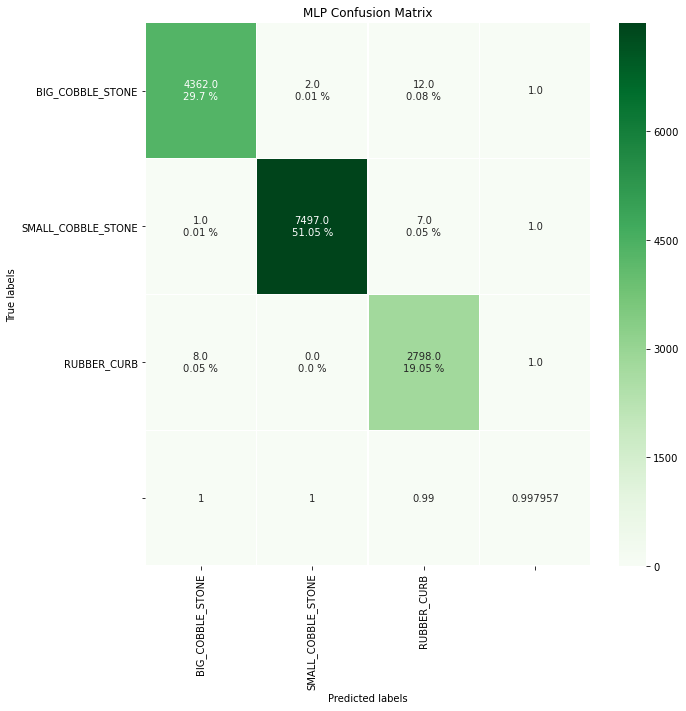

In [5]:
# load the model from disk
# MLP_model = joblib.load('MLP_model.sav')
test_MLP(MLP_model, normalized_X_test, test_y)

In [6]:
CNN_model, CNN_test_X, CNN_test_Y_one_hot, CNN_test_y  = train_CNN(data, label)

Train on 23987 samples, validate on 10281 samples
Epoch 1/10
23987/23987 [==============================] - 25s 1ms/sample - loss: 0.7019 - accuracy: 0.7489 - val_loss: 0.5315 - val_accuracy: 0.8602
Epoch 2/10
23987/23987 [==============================] - 18s 770us/sample - loss: 0.4819 - accuracy: 0.8654 - val_loss: 0.4156 - val_accuracy: 0.8785
Epoch 3/10
23987/23987 [==============================] - 15s 646us/sample - loss: 0.3782 - accuracy: 0.8837 - val_loss: 0.3361 - val_accuracy: 0.9045
Epoch 4/10
23987/23987 [==============================] - 17s 696us/sample - loss: 0.3036 - accuracy: 0.9060 - val_loss: 0.2676 - val_accuracy: 0.9260
Epoch 5/10
23987/23987 [==============================] - 18s 769us/sample - loss: 0.2489 - accuracy: 0.9240 - val_loss: 0.2199 - val_accuracy: 0.9320
Epoch 6/10
23987/23987 [==============================] - 20s 831us/sample - loss: 0.2059 - accuracy: 0.9332 - val_loss: 0.1841 - val_accuracy: 0.9426
Epoch 7/10
23987/23987 [======================

In [ ]:
evaluate_CNN_model(CNN_model, CNN_test_X, CNN_test_Y_one_hot, verbose=0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-cef5c663f2ce>", line 1, in <module>
    evaluate_CNN_model(CNN_model, CNN_test_X, CNN_test_Y_one_hot, verbose=0)
TypeError: evaluate_CNN_model() got an unexpected keyword argument 'verbose'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-cef5c663f2ce>", line 1, in <module>
    evaluate_CNN_model(CNN_model, CNN_test_X, CNN_test_Y_one_hot, verbose=0)
TypeError: evaluate_CNN_model() got an unexpected keyword argument 'verbose'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in ru

ERROR! Session/line number was not unique in database. History logging moved to new session 2258
[[4348    0  368]
 [   8 7499  141]
 [  15    0 2308]]
Accuracy: 0.963777490297542
Precision: Class A [0.99 1.   0.82]
Recall: Class A [0.92 0.98 0.99]


C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\sklearn\metrics\_classification.py:1301: UserWarning: Note that pos_label (set to 'BIG_COBBLE_STONE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\kamal\Anaconda3\envs\uni_project\lib\site-packages\sklearn\metrics\_classification.py:1301: UserWarning: Note that pos_label (set to 'BIG_COBBLE_STONE') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


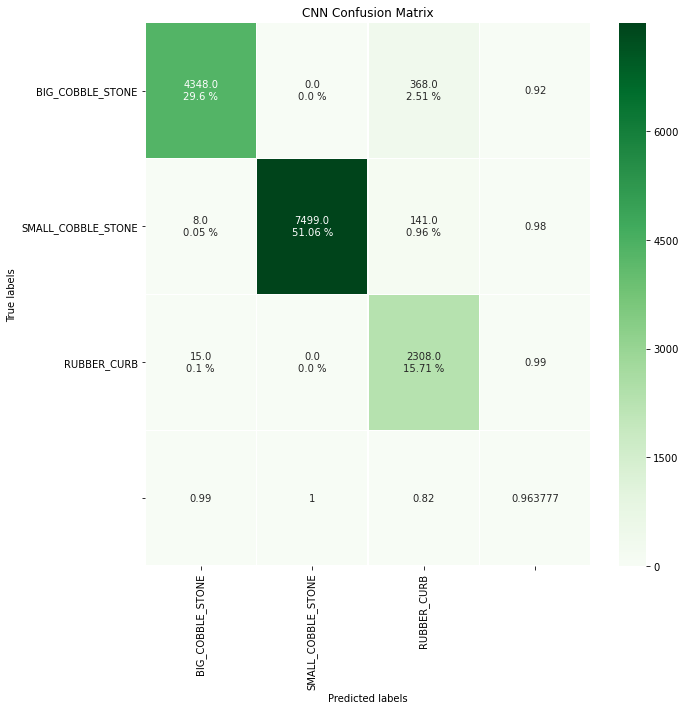

In [7]:
test_CNN_model(CNN_model, CNN_test_X, CNN_test_y)

In [8]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import cross_val_score
# for i in range(5,50):
#     clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i), random_state=12)
#     scores = cross_val_score(clf, normalized_X_train, train_y, cv=4, scoring="accuracy")
#     print("hidden layer", i, "score average", scores.mean())